**Uber Data Analysis Project**

Talking about our Uber data analysis project, data storytelling is an important component of Machine Learning through which companies are able to understand the background of various operations. With the help of visualization, companies can avail the benefit of understanding the complex data and gain insights that would help them to craft decisions.
The *dataset* that we are using is of **Uber Pickups in New York City Dataset FY - 2014**

# 1. Importing the Essential Packages

In [4]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("DT")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘later’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’




In [4]:
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 2. Importing the Essential Libraries

In [36]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)

# 3. Creating vector of colors to be implemented in our plots

In this step of data science project, we will create a vector of our colors that will be included in our plotting functions.

In [8]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")

# 4. Reading the Data into their designated variables

Now, we will read several csv files that contain the data from April 2014 to September 2014. We will store these in corresponding data frames like apr_data, may_data, etc. After we have read the files, we will combine all of this data into a single dataframe called ‘data_2014’.

Then, in the next step, we will perform the appropriate formatting of Date.Time column. Then, we will proceed to create factors of time objects like day, month, year etc.

In [10]:
apr_data <- read.csv("uber-raw-data-apr14.csv")
may_data <- read.csv("uber-raw-data-may14.csv")
jun_data <- read.csv("uber-raw-data-jun14.csv")
jul_data <- read.csv("uber-raw-data-jul14.csv")
aug_data <- read.csv("uber-raw-data-aug14.csv")
sep_data <- read.csv("uber-raw-data-sep14.csv")

data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)

data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")

data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")

data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)

data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

In [11]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

# 5. Plotting the trips by the hours in a day

In the next step or R project, we will use the ggplot function to plot the number of trips that the passengers had made in a day. We will also use dplyr to aggregate our data. In the resulting visualizations, we can understand how the number of passengers fares throughout the day. We observe that the number of trips are higher in the evening around 5:00 and 6:00 PM.

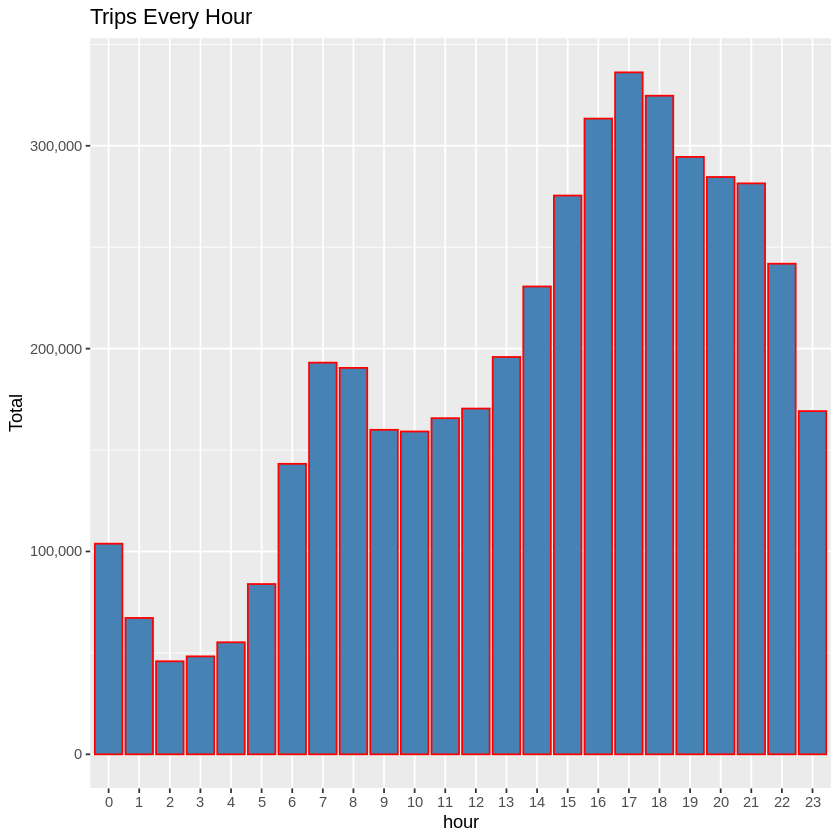

In [13]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

Trips by Hour and Month

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



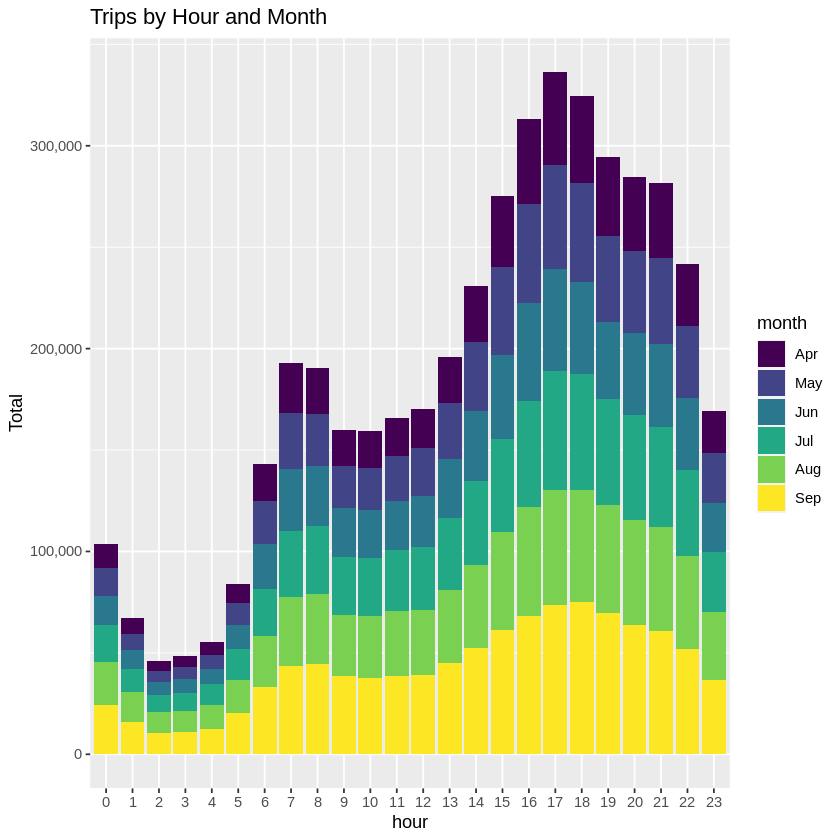

In [14]:
month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n())
ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Trips by Hour and Month") +
           scale_y_continuous(labels = comma)

#6. Plotting data by trips during every day of the month

In this section of DataFlair R project, we will learn how to plot our data based on every day of the month.

We observe from the resulting visualization that 30th of the month had the highest trips in the year which is mostly contributed by the month of April.

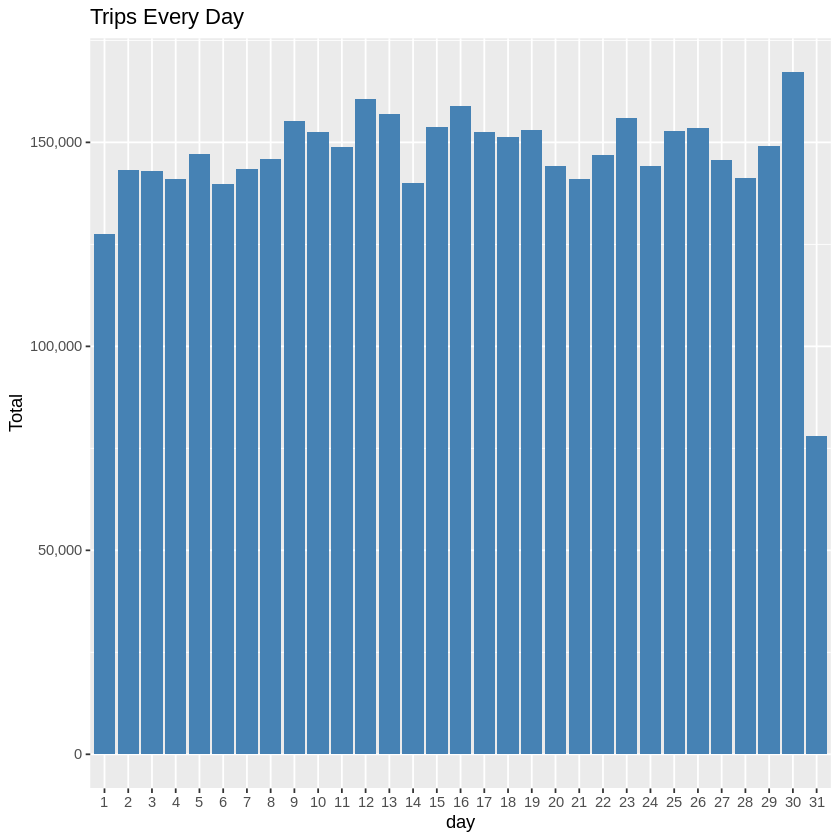

In [16]:
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue") +
           ggtitle("Trips Every Day") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

Trips by Day and Month

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



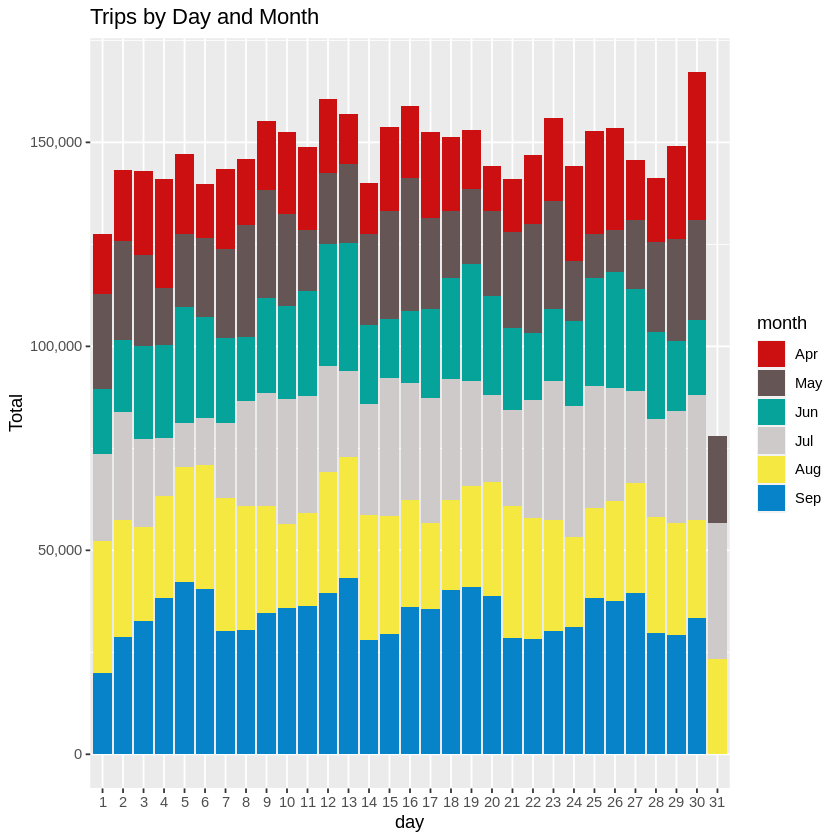

In [17]:
day_month_group <- data_2014 %>%
         group_by(month, day) %>%
             dplyr::summarize(Total = n())

ggplot(day_month_group, aes(day, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Day and Month") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

#7. Number of Trips taking place during months in a year

In this section, we will visualize the number of trips that are taking place each month of the year. 

In the output visualization, we observe that most trips were made during the month of September.

 Furthermore, we also obtain visual reports of the number of trips that were made on every day of the week.

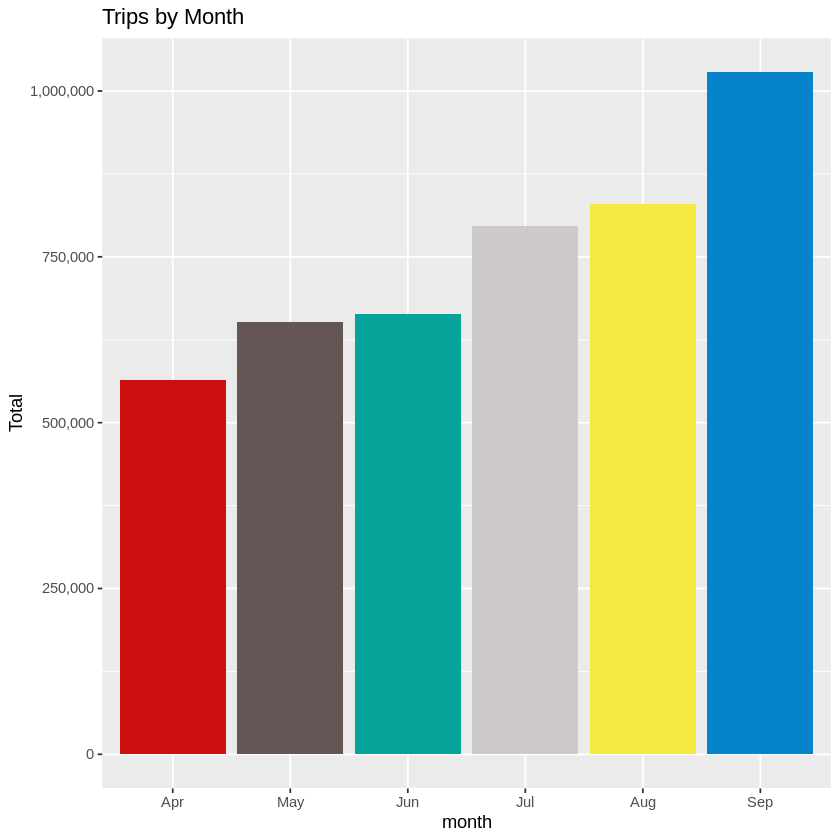

In [20]:
ggplot(month_group , aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

Trips by Day and Month

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



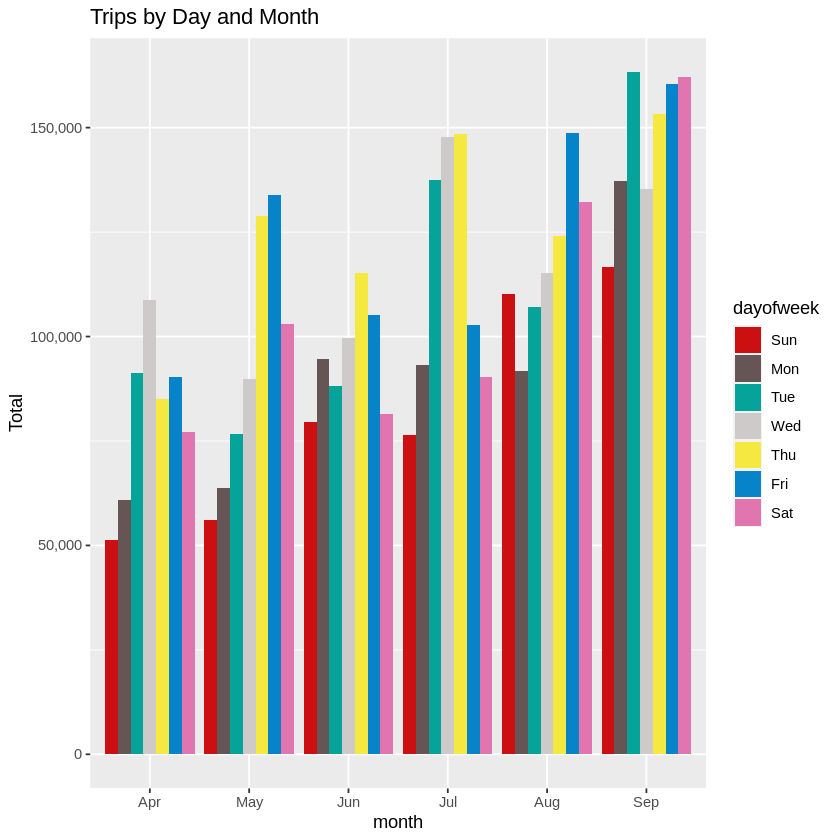

In [21]:
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())

ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

#8. Finding out the number of Trips by bases

In the following visualization, we plot the number of trips that have been taken by the passengers from each of the bases. 

There are five bases in all out of which, we observe that B02617 had the highest number of trips. 

Furthermore, this base had the highest number of trips in the month B02617. 

Thursday observed highest trips in the three bases – B02598, B02617, B02682.

Trips by Bases

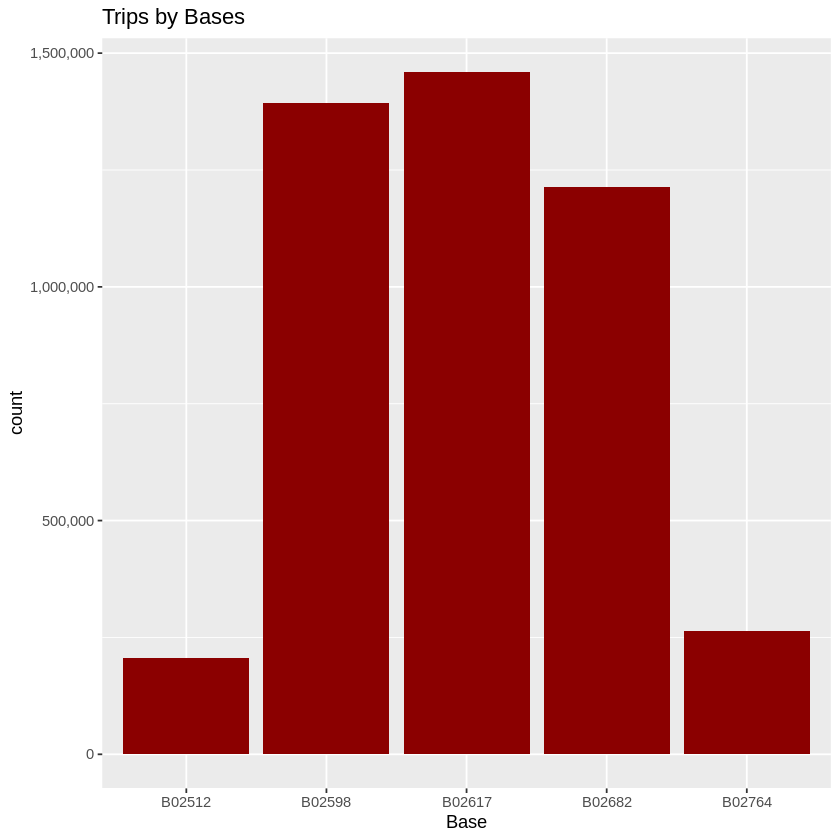

In [22]:
ggplot(data_2014, aes(Base)) + 
 geom_bar(fill = "darkred") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases")

Trips by Bases and Month

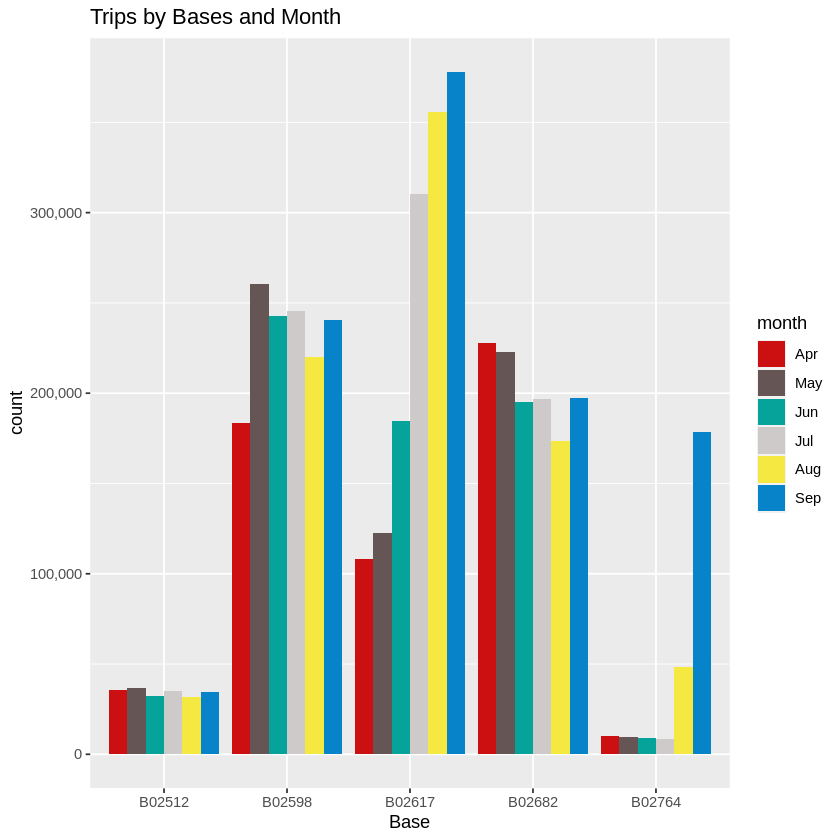

In [23]:
ggplot(data_2014, aes(Base, fill = month)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and Month") +
 scale_fill_manual(values = colors)

Trips by Bases and Day of Week

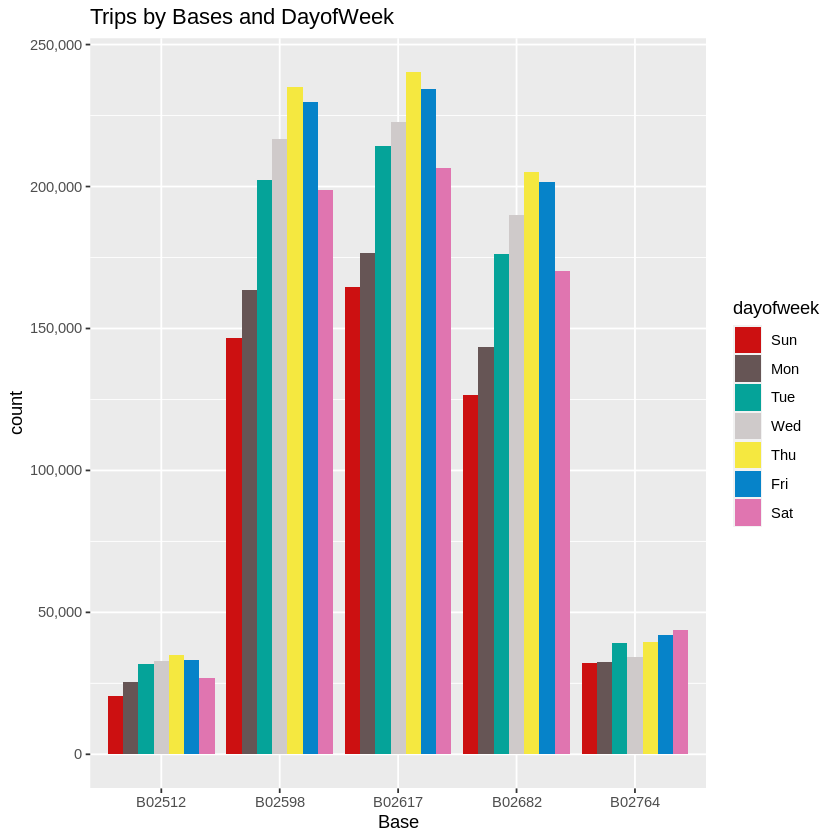

In [24]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colors)

#9. Creating a Heatmap visualization of day, hour and month

In this section, we will learn how to plot heatmaps using ggplot(). We will plot five heatmap plots –

First, we will plot Heatmap by Hour and Day.

Second, we will plot Heatmap by Month and Day.

Third, a Heatmap by Month and Day of the Week.

Fourth, a Heatmap that delineates Month and Bases.

Finally, we will plot the heatmap, by bases and day of the week.

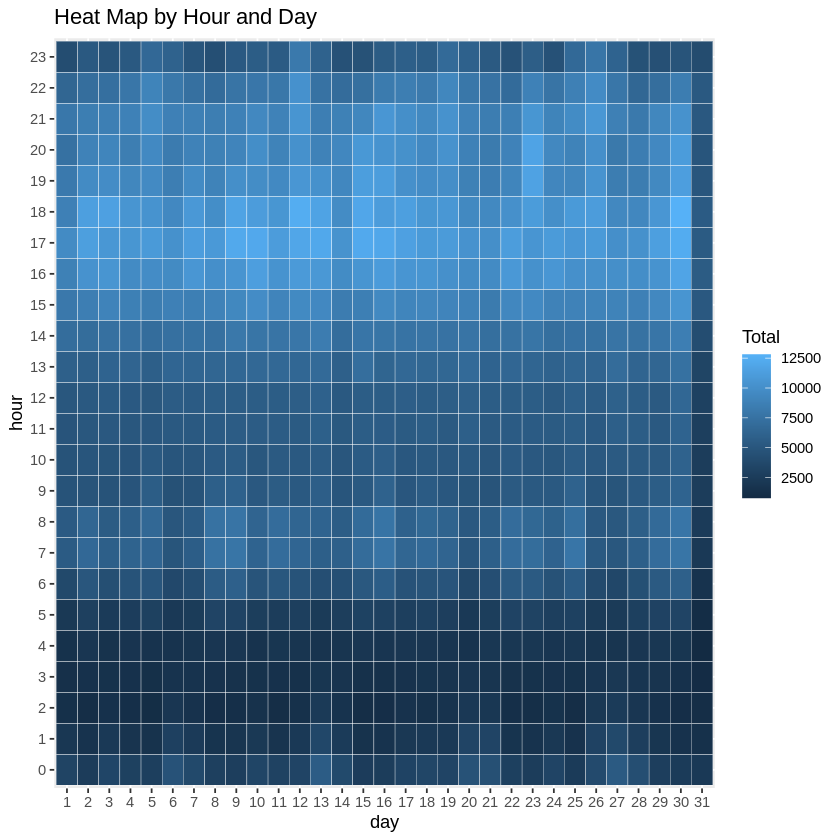

In [26]:
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Hour and Day")

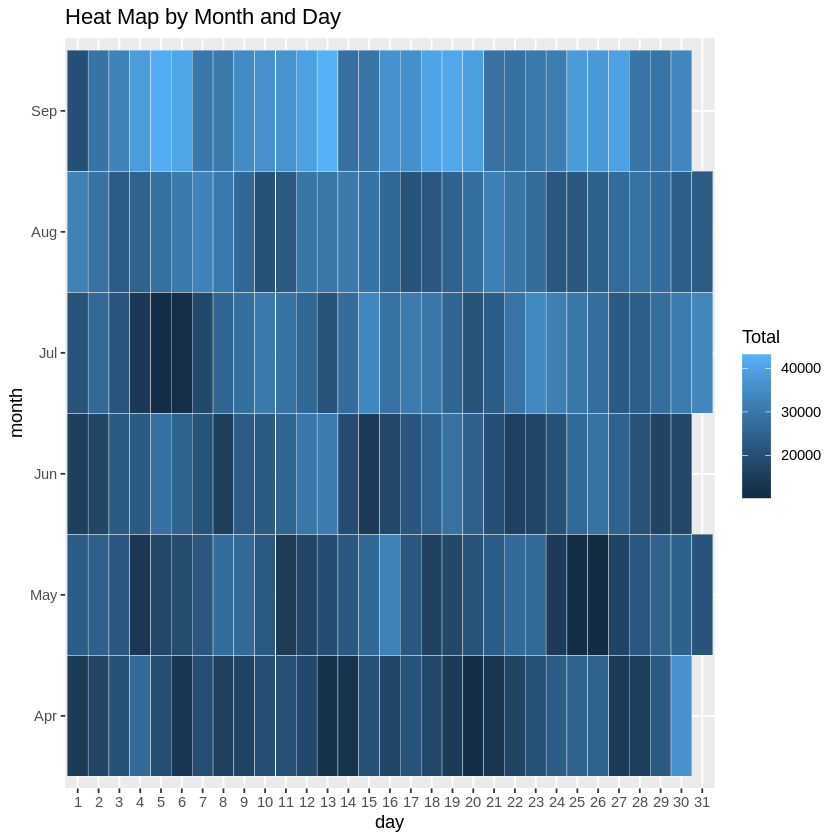

In [27]:
ggplot(day_month_group, aes(day, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day")
              

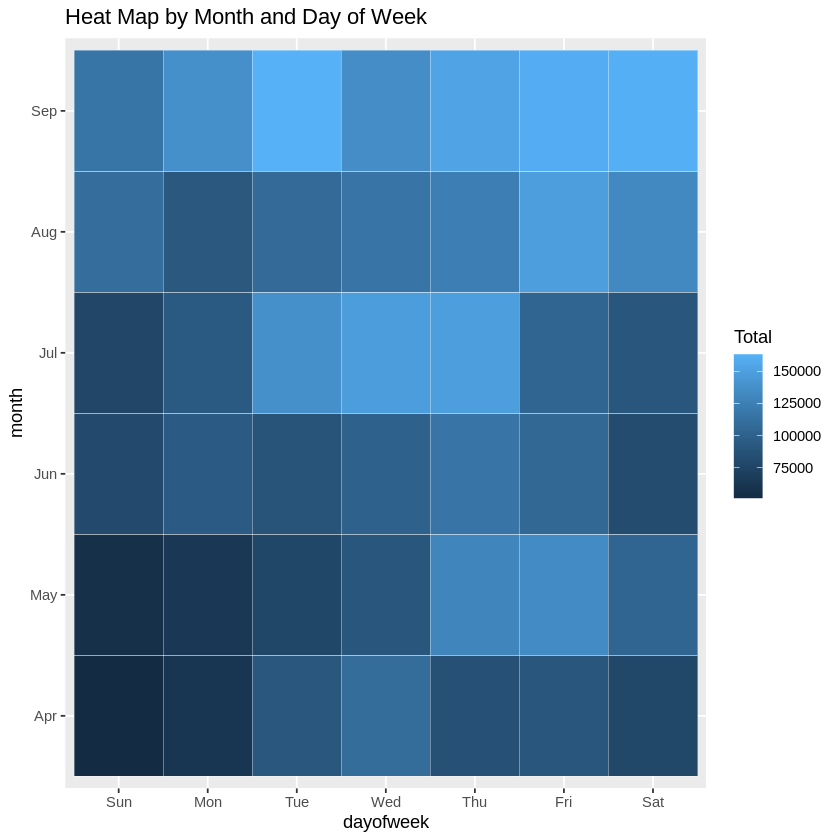

In [28]:
ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day of Week")

`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.



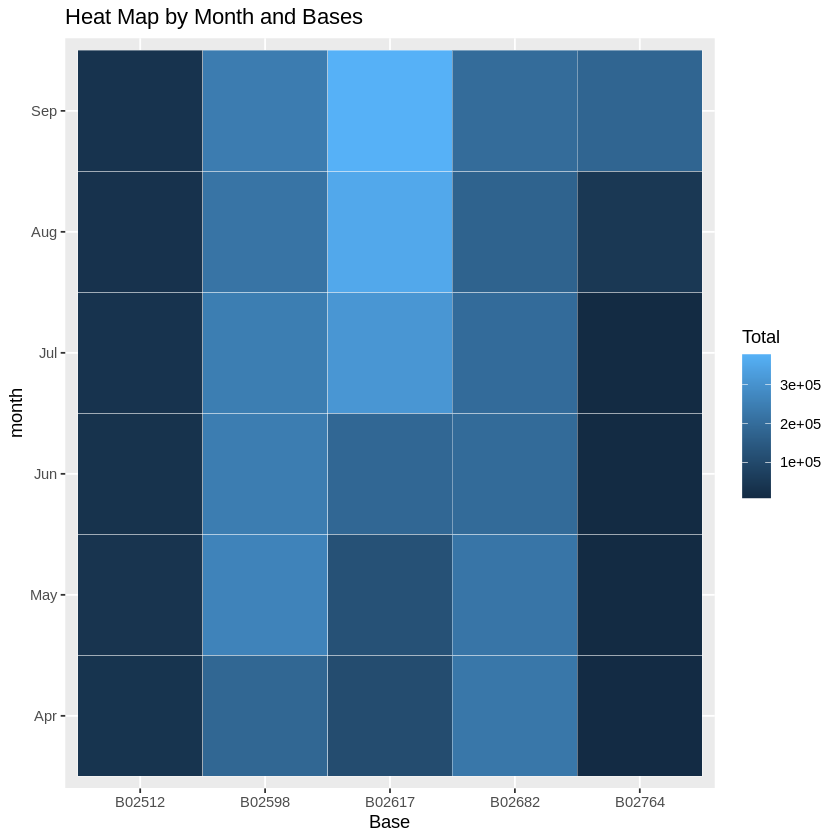

In [29]:
month_base <-  data_2014 %>%
                    group_by(Base, month) %>%
                        dplyr::summarize(Total = n()) 

day0fweek_bases <-  data_2014 %>%
                    group_by(Base, dayofweek) %>%
                        dplyr::summarize(Total = n()) 

ggplot(month_base, aes(Base, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Bases")

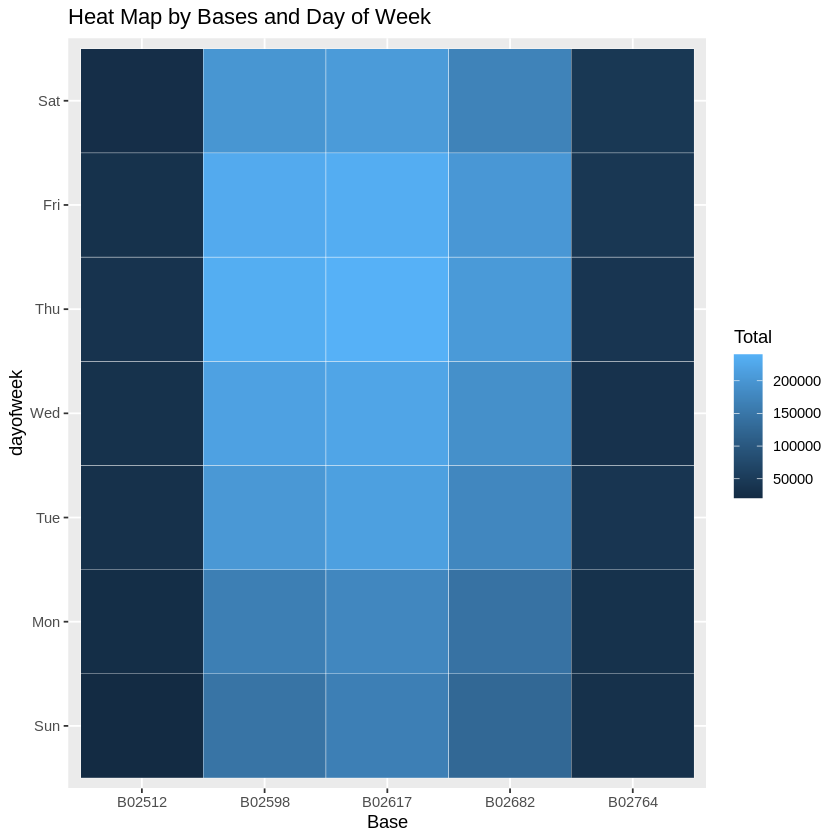

In [30]:
ggplot(day0fweek_bases, aes(Base, dayofweek, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Bases and Day of Week")

#10. Creating a map visualization of rides in New York

In the final section, we will visualize the rides in New York city by creating a geo-plot that will help us to visualize the rides during 2014 (Apr – Sep) and by the bases in the same period.

NYC MAP BASED ON UBER RIDES DURING 2014

Warning message:
“Removed 71701 rows containing missing values (geom_point).”


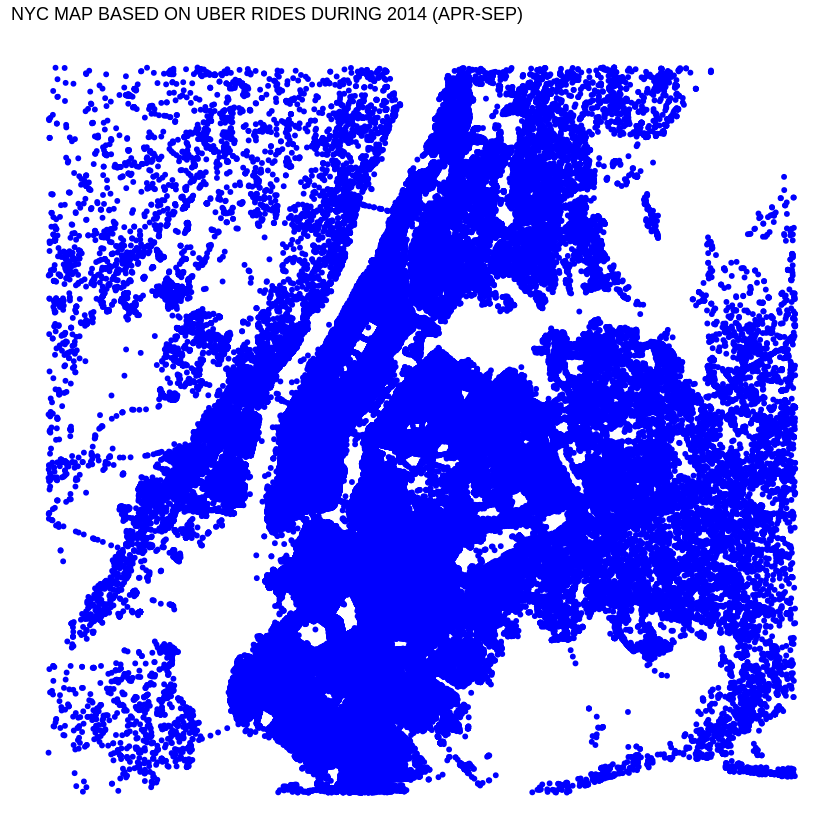

In [37]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004

ggplot(data_2014, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")

NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE

Warning message:
“Removed 71701 rows containing missing values (geom_point).”


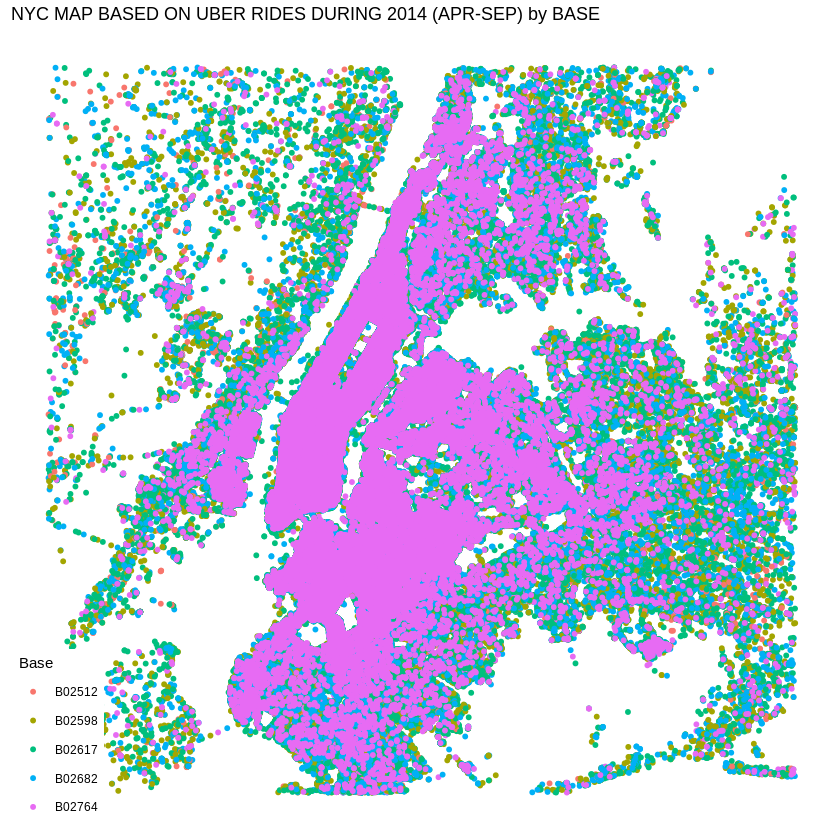

In [38]:
ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")